<a href="https://colab.research.google.com/github/ayan6943/Mileage-Prediction-ML-Project/blob/main/Mileage_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mileage Prediction**

---



# **Objective**

The objective of the Mileage Prediction project is to develop a machine learning model that accurately predicts vehicle fuel efficiency (miles per gallon, mpg) based on various features such as engine displacement, horsepower, and weight.

This project aims to explore and understand the relationships between these features and fuel efficiency through data visualization and statistical analysis. By testing and fine-tuning different machine learning algorithms, the project seeks to identify the model with the highest predictive accuracy. Additionally, the project involves handling missing data through imputation techniques to ensure a clean dataset.

The ultimate goal is to provide actionable insights that can help manufacturers optimize vehicle design for better fuel efficiency and assist consumers in making informed decisions when purchasing vehicles.

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# **Import Data**

In [2]:
mileage=pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv")


In [3]:
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# **Data Preprocessing**

In [4]:
mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
mileage.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# **Data Visualisation**

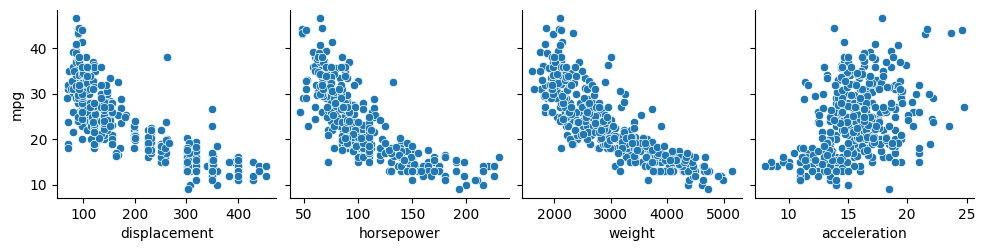

In [6]:
sns.pairplot(mileage,x_vars=['displacement','horsepower','weight','acceleration'],y_vars=['mpg'])


<Axes: xlabel='displacement', ylabel='mpg'>

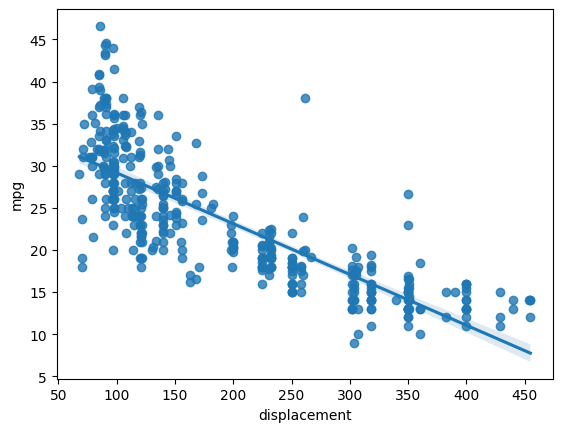

In [7]:
sns.regplot(x='displacement',y='mpg',data=mileage)

# **Define Target Variable (y) and Feature Variable (X)**

In [8]:
mileage.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [9]:
X=mileage[['displacement','horsepower','weight','acceleration']]
y=mileage['mpg']

In [10]:
X.shape

(398, 4)

In [11]:
y.shape

(398,)

# **Train and Test Split Data**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((318, 4), (80, 4), (318,), (80,))

# **Linear Regression Model**

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso

In [45]:
lr=LinearRegression()
r=Ridge()
l=Lasso()

In [46]:
#Removing NaN values from X
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index] # Ensure y_train is aligned with the new X_train
lr.fit(X_train,y_train)
r.fit(X_train,y_train)
l.fit(X_train,y_train)

Lasso()

In [47]:
lr.intercept_

np.float64(46.19753712820625)

In [48]:
lr.coef_

array([-0.00858589, -0.04889997, -0.00501774, -0.06609764])

# **Prediction**

In [49]:
y_pred=lr.predict(X_test)
y_pred1=l.predict(X_test)
y_pred2=r.predict(X_test)

In [ ]:
y_pred

# **Model Accuracy**

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [58]:
mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 3.85


In [52]:
mape=mean_absolute_percentage_error(y_test,y_pred)
mape1=mean_absolute_percentage_error(y_test,y_pred1)
mape2=mean_absolute_percentage_error(y_test,y_pred2)
mape

0.1444657957868412

In [53]:
r2_score(y_test,y_pred)

0.7271544399659615

In [54]:
accuracy_percentage = 100 * (1 - mape)
accuracy_percentage = round(accuracy_percentage, 2)
print(f"LR_Accuracy: {accuracy_percentage}%")
accuracy_percentage1 = 100 * (1 - mape1)
accuracy_percentage1 = round(accuracy_percentage1, 2)
print(f"Lasso_Accuracy: {accuracy_percentage1}%")
accuracy_percentage2 = 100 * (1 - mape2)
accuracy_percentage2 = round(accuracy_percentage2, 2)
print(f"Ridge_Accuracy: {accuracy_percentage2}%")

LR_Accuracy: 85.55%
Lasso_Accuracy: 85.67%
Ridge_Accuracy: 85.55%


# **Model Visualisation**

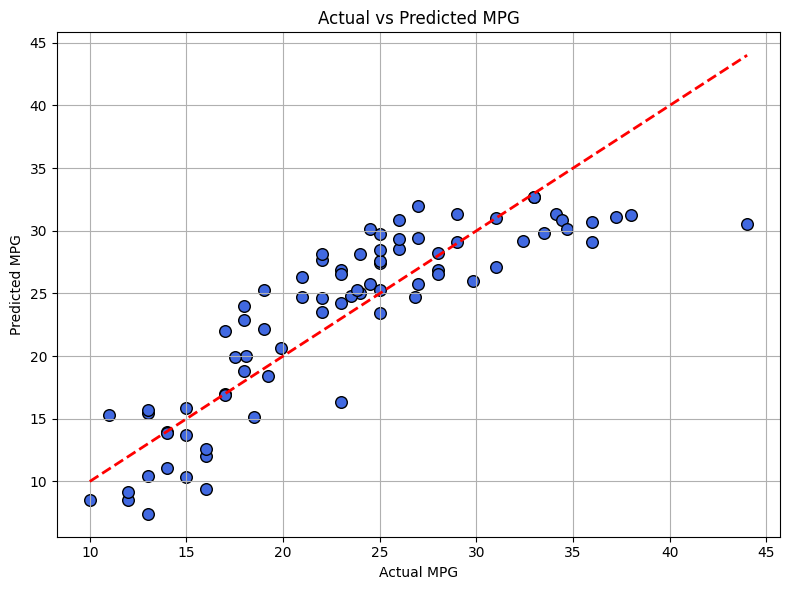

In [55]:
import matplotlib.pyplot as plt

# y_test = actual target values (from test split)
# y_pred = predictions from your model

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', edgecolor='k', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')

plt.title('Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid(True)
plt.tight_layout()
plt.show()


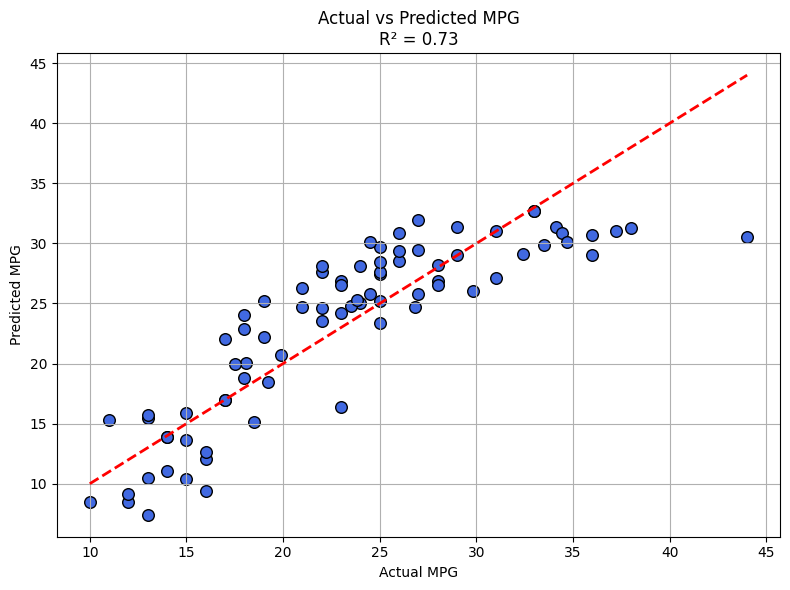

In [56]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', edgecolor='k', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title(f'Actual vs Predicted MPG\nR² = {r2:.2f}')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid(True)
plt.tight_layout()
plt.show()
